In [25]:
#Note: this notebook was run on google colab
#From https://pytorch.org/tutorials/beginner/basics/intro.html
from google.colab import drive
drive.mount('/content/gdrive')
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [18]:
# CIFAR10 from https://www.cs.toronto.edu/~kriz/cifar.html, need to cite 'Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.' properly
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [19]:
#-reminder to cite this- 
#display an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


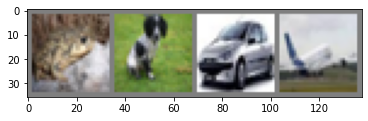

 frog   dog   car plane


In [21]:
# show some images from the set
dataiter = iter(trainloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
# print labels (%5s= print at width of 5)
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [22]:
#define convolutional neural network for images

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [23]:
#define loss function

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
for epoch in range(2):  # loss function loops over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is in the form of a  list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients to start
        optimizer.zero_grad()

        # forward & backward, then optimization
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.177
[1,  4000] loss: 1.842
[1,  6000] loss: 1.680
[1,  8000] loss: 1.578
[1, 10000] loss: 1.518
[1, 12000] loss: 1.470
[2,  2000] loss: 1.404
[2,  4000] loss: 1.389
[2,  6000] loss: 1.347
[2,  8000] loss: 1.339
[2, 10000] loss: 1.314
[2, 12000] loss: 1.293
Finished Training


In [28]:
imshow(MyDrive/1c790b11364b3be233a959bdade49c54.png)

SyntaxError: ignored

In [ ]:
#save and reload trained NN
net = Net()
net.load_state_dict(torch.load(PATH))